### Examen: Procesos estocásticos 2022-2023 (convocatoria ordinaria)

2023-01-11

#### Apellidos: Zorrilla Gamboa
#### Nombre: Jon

1. El trabajo debe ser **individual**. 
2. Se permite utilizar el material del curso, así como información, excepto código, de otras fuentes. En caso de que se utilice material ajeno, se debe citar tales fuentes.

3. Para que la entrega sea válida es necesario rellenar la declaración de autoría, firmarla y entregarla.

4. El plazo de entrega se extiende hasta las 20:00 del lunes 2022-06-13.

5. La entrega consiste en un único fichero `.zip`, cuyo nombre debe ser de la forma 
`<apellido1>_<apellido2>_<nombre>_PE_2020_2021.zip`. En el nombre no se deben utilizar tildes. espacios, mayúsculas, o tildes. Por ejemplo,
`suarez_gonzalez_alberto_PE_2020_2021.zip`.

Este fichero comprimido debe incluirlos siguientes ficheros:
    1. Este cuaderno (*notebook*) de Python con las soluciones de ejercicios y las derivaciones en celdas de tipo *markdown*. 
En caso de que se prefiera entregar derivaciones manuscritas, se incluirán en el cuaderno de Python como imágenes. 
    2. Ficheros ficheros `.py` necesarios para se pueda ejecutar el código del cuaderno de Python.
    4. La declaración de autoría rellena y firmada. La firma puede ser escaneada.

5. Indicad vuestro nombre y apellidos y fecha de realización al principio de todos los ficheros entregados.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import arrival_process_simulation
import BM_simulators 
import stochastic_plots

from scipy.linalg import eig
from scipy.sparse.linalg import eigs
import random

from matplotlib.pyplot import figure
from stochastic_plots import plot_trajectories

import sde_solvers as sde
from scipy import stats
import matplotlib.pyplot as plt
import stochastic_plots as stoch

### Ejercicio 1: Cadenas de Markov.

#### Ejercicio 1.1.

Consideremos una cadena de Markov con 5 estados, cuya matriz de transición es
$$
\begin{array}{c|c|c|c|c}
\text{Estado inicial / final} & P_1 & P_2 & P_3 & P_4 & P_5\\
\hline
P_1 & *    & 0.2  & 0.1 & 0.4 & 0.3    \\
P_2 & 0.3  & *    & 0.5 & 0.1 & 0.1     \\
P_3 & 0.3  & 0.4  & *   & 0.1 & 0.2     \\
P_4 & 0.3  & 0.3  & 0.1 & *   & 0.3 \\
P_5 & 0.1  & 0.1  & 0.7 & 0.1  & * 
\end{array}
$$

1.  Deriva la solución estacionaria para este proceso. 
2. Simula trayectorias del proceso para $t = 0, 1, 2, ..., N$ suponiendo que en el instante $t = 0$ el sistema se encuentra en el estado $P(t=0)  = P_3$.
3. Haz la gráfica de $3$ de las trayectorias simuladas con $N = 100$. 
4. Utilizando la secuencia de estados de la cadena de Markov en el régimen estacionario:
    1. Estima la distribución estacionaria del proceso a partir de una única trayectoria.
    2. Estima la distribución del proceso en el límite $t \rightarrow \infty$ a partir de los estados finales para $M = 1000$ trayectorias simuladas.
    3. Compara los resultados de los dos apartados anteriores.
\end{enumerate}
\end{enumerate}
\item
\end{comment}



- 1. La solución estacionaria es aquella para la cual, dado un vector $\pi$, este es un autovector izquierdo de la matriz de transición P con autovalor 1. Es decir, $\pi^t P(t) = \pi(t)^t$. Para ello, resolveremos el problema de autovalores mediante python.

En primer lugar, sabemos que los autovectores izquierdos de una matriz son los autovectores derechos de la matriz traspuesta, traspuestos.

In [69]:
np.set_printoptions(precision=4)
trans_mat = np.array([[0, 0.2, 0.1, 0.4, 0.3],
            [0.3, 0, 0.5, 0.1, 0.1],
            [0.3, 0.4, 0, 0.1, 0.2],
            [0.3, 0.3, 0.1, 0, 0.3],
            [0.1, 0.1, 0.7, 0.1, 0]]).reshape(5,5)

eigenvalues, eigenvectors = eigs(trans_mat.T)
print(eigenvalues[0])
print(eigenvectors[:,0])

(0.9999999999999998+0j)
[-0.4463+0.j -0.4566+0.j -0.5793+0.j -0.3213+0.j -0.3918+0.j]


C:\Users\jonzo\anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1266: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


Como podemos observar, obtenemos el vector [-0.4463 -0.4566 -0.5793 -0.3213 -0.3918], con autovalor asociado 1.

- 2. Simulamos trayectorias suponiendo que $P(t = 0) = P_3$.

In [70]:
n = 100
estado = np.array([0.3, 0.4, 0, 0.1, 0.2])
for i in range(n):
    res = np.dot(estado, trans_mat)
    estado = res
print(estado)

[0.2033 0.208  0.2639 0.1464 0.1785]


Como se puede observar, para n = 100, llegamos hasta ese estado final.

- 3. Hacemos las representaciones de las trayectorias.

In [71]:
elements = [0,1,2,3,4]
distribution = trans_mat[2] # Condicion inicial
def calculate_X(N, elements, distribution):
    x = []
    X = []
    for j in range(0,3):
        for i in range(N):
            next_position = random.choices(elements, weights=distribution, k=1)[0]
            distribution = trans_mat[next_position]
            x.append(next_position)
        X.append(x)
        x = []
    return X

In [72]:
X = calculate_X(N=100, elements = elements, distribution=distribution)

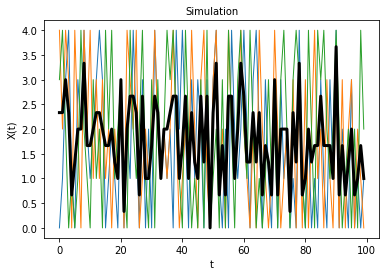

In [73]:
X = np.array(X)
t = [i for i in range(100)]
plot_trajectories(t, X)

- 4.1 Estimamos la distribución estacionaria estimada a partir de una única trayectoria.

In [74]:
_, counts = np.unique(X[0], return_counts=True)
distribucion_100 = counts/np.sum(counts)
print(distribucion_100)

[0.28 0.21 0.21 0.17 0.13]


- 4.2 Estimamos la distribución del proceso en el límite $t \rightarrow \infty$ a partir de los estados finales para $M = 1000$ trayectorias simuladas.

In [75]:
X_1000 = calculate_X(N=1000, elements = elements, distribution=distribution)

In [76]:
X_1000 = np.array(X_1000)
_, counts = np.unique(X_1000[0], return_counts=True)
distribucion_1000 = counts/np.sum(counts)
print(distribucion_1000)

[0.211 0.207 0.274 0.124 0.184]


- 4.3 Comparamos los resultados mediante la diferencia de ambas trayectorias:

In [77]:
distribucion_1000 - distribucion_100

array([-0.069, -0.003,  0.064, -0.046,  0.054])

Como podemos observar, aún existen diferencias entre la distribución para 100 iteraciones y para 1000 iteraciones, pero se hacen cada vez más pequeñas.

#### Ejercicio 1.2
Suponiendo que se trata de una cadena de Markov en tiempo continuo, y que, en promedio, el proceso pasa $2$ minutos en $P_1,$ $30$ segundos en $P_2$, $1$ minuto en $P_3$, $1.5$ minutos en $P_4$, y $3$ minutos en $P_5$.

1. Escribe la matriz de transiciones para el proceso de saltos subyacente (*jump process*). 
2. Deriva la distribución estacionaria para el proceso de saltos.
3. Deriva la distribución estacionaria para la cadena de Markov en tiempo continuo.
4. Deriva el correspondiente generador infinitesimal.
5. A partir del generador infinitesimal deriva la distribucón estacionaria del proceso y compárala con el resultado anterior.
6. Simula trayectorias del proceso para suponiendo que en el instante $t = 0$ el sistema se encuentra en el estado $P(t=0)  = P_1$.
7. Utilizando la secuencia de estados de la cadena de Markov en el régimen estacionario:
    1. Estima la distribución estacionaria del proceso de saltos subyacente a partir de una única trayectoria de la cadena de Markov en tiempo continuo. 
    2. Estima la distribución estacionaria de la cadena de Markov en tiempo continuo a partir de una única trayectoria del proceso. 
    3. Estima la distribución de la cadena de Markov en tiempo continuo en el límite $t \rightarrow \infty$ a partir de los estados finales en $M = 1000$ trayectorias simuladas.
    4. Comenta los resultados de los apartados anteriores.

8. ¿Coinciden las distribuciones estacionarias de una cadena de Markov en tiempo discreto con el mismo diagrama de transición y la derivada para el proceso en tiempo continuo? En caso de que coincidan indica la razón. En caso de que no coincidan, define una cadena de Markov en tiempo continuo con el mismo diagrama de transiciones que tenga la misma distribución estacionaria que la correspondiente en tiempo discreto.

- 1. Escribimos la matriz de transición:

$$
\begin{array}{c|c|c|c|c}
\text{Estado inicial / final} & P_1 & P_2 & P_3 & P_4 & P_5\
\hline
P_1 & 0    & 0.2  & 0.1 & 0.4 & 0.3    \
P_2 & 0.3  & 0    & 0.5 & 0.1 & 0.1     \
P_3 & 0.3  & 0.4  & 0   & 0.1 & 0.2     \
P_4 & 0.3  & 0.3  & 0.1 & 0   & 0.3 \
P_5 & 0.1  & 0.1  & 0.7 & 0.1  & 0 
\end{array}
$$

- 2. La distribución estacionaria es la distribución obtenida en el ejercicio anterior.

In [78]:
print(distribucion_1000)

[0.211 0.207 0.274 0.124 0.184]


- 3. Distribución estacionaria para la cadena de Markov en tiempo continuo.

In [79]:
lambdas = [2, 0.5, 1, 1.5, 3]
S = sum(distribucion_1000/lambdas) #normalizamos
distr = distribucion_1000/lambdas/S
distr

array([0.1125, 0.4416, 0.2923, 0.0882, 0.0654])

- 4. Generador infinitesimal.

Dada la definición del generador infinitesimal, obtenemos

$$
\begin{array}{c|c|c|c|c}
\text{Estado inicial / final} & P_1 & P_2 & P_3 & P_4 & P_5\
\hline
P_1 & -2    & 0.4  & 0.2 & 0.8 & 0.6    \
P_2 & 0.15  & -0.5    & 0.25 & 0.05 & 0.05     \
P_3 & 0.3  & 0.4  & -1   & 0.1 & 0.2     \
P_4 & 0.45  & 0.45  & 0.15 & -1.5   & 0.45 \
P_5 & 0.3  & 0.3  & 2.1 & 0.3  & -3 
\end{array}
$$

- 5. Derivamos la distribución estacionaria del proceso a partir del generador infinitesimal. Sabemos que la distribución estacionaria es aquella que multiplicándola por la matriz generadora da un resultado nulo.

In [80]:
G = np.array([[-2, 0.4, 0.2, 0.8, 0.6],
            [0.15, -0.5, 0.25, 0.05, 0.06],
            [0.3, 0.4, -1, 0.1, 0.2],
            [0.45, 0.45, 0.15, -1.5, 0.45],
            [0.3, 0.3, 2.1, 0.3, -3]])

np.linalg.matrix_rank(G[0:4])

4

Como siempre, el rango de la matriz G es n-1, donde n es el número de filas y columnas de la matriz. En este caso, hemos comprobado que el rango sigue siendo 4 para la matriz cuando le quitamos la última columnsa, por lo que esta columna es combinación lineal de las columnas anteriores. Por ello, una vez que el rango de la matriz formada por todas las columnas menos la última es igual al número de columnas, y teniendo en cuenta la normalización, tenemos un sistema completo de ecuaciones. De hecho, si encontramos una solución, esta será única. Por ello, podemos hacer uso del siguiente sistema, donde hemos impuesto la normalización:

In [81]:
G_prima = np.array([[-2, 0.4, 0.2, 0.8, 1],
            [0.15, -0.5, 0.25, 0.05, 1],
            [0.3, 0.4, -1, 0.1, 1],
            [0.45, 0.45, 0.15, -1.5, 1],
            [0.3, 0.3, 2.1, 0.3, 1]])

np.linalg.solve(G_prima.T, [0,0,0,0,1])

array([0.1083, 0.4432, 0.2812, 0.104 , 0.0634])

Que, este vector es igual al vector obtenido en el apartado anterior.

- 6. Simulamos trayectorias suponiendo que $P(t=0) = P_1$.

In [82]:
beta_scale = [1.0/lambdas[i] for i in range(5)]
t0 = 0.0
t1 = 100.0
M = 5 

In [83]:
# Method 1: Simulation based on the generation of interarrival times

arrival_times = [ [] for _ in range(M) ]
beta_scale = [1.0/lambdas[i] for i in range(5)]
for m in range(M):
    # add exponentially distributed interarrival time 
    arrival_time = t0 + np.random.exponential(beta_scale[m])
    while arrival_time < t1:
        arrival_times[m].append(arrival_time)
        # add exponentially distributed interarrival time 
        arrival_time += np.random.exponential(beta_scale[m])

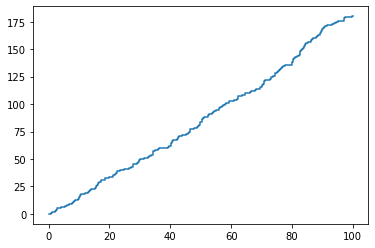

In [84]:
#  Plot count process
arrival_times_plot = np.hstack(([t0], 
                                arrival_times[0], 
                                [t1]))
states_plot = np.hstack((range(0, len(arrival_times[0]) + 1), 
                         len(arrival_times[0])))

_ = plt.step(arrival_times_plot, 
             states_plot, 
             where='post')

- 7.1. Estimamos la distribución estacionaria a partir de una única cadena de Markov.

### Ejercicio 2.

Consideremos el puente browniano estándar, $BB_{std}(t)$, definido en $[0,1]$,  con $BB_{std}(0) = BB_{std}(1) = 0$, y $\sigma = 1$.

La evolución de $BB_{std}(t)$ se puede expresar en función de un proceso de Wiener (browniano estándar), 
$ BB_{std}(t) = W(t) - W(1) t $.

#### Ejercicio 2.1.
Para este proceso:
1. Deriva el valor esperado del proceso: $m(t) = \mathbb{E}\left[ {BB}_{std}(t) \right]$.  
2. Deriva la función de autocovarianzas:  $ 
\gamma(s, t) = 
 \mathbb{E} \left[\left(BB_{std}(s) - \mathbb{E}\left[ {BB}_{std}(s) \right] \right)  \left(BB_{std}(t) \right] - \mathbb{E}\left[ BB_{std}(t) \right] \right). 
$
3. Deriva la función de autocorrelaciones $\rho(s, t)$.
4. ¿Es un proceso Markoviano? ¿Es estacionario? ¿Es un proceso Gaussiano?

1. Dada la expresión del puente Browniano,

$$BB_{std}(t) = W(t) - W(1)t$$

La media o valor esperado del proceso será:

$$\mathbb{E}[BB_{std}(t)] = \mathbb{E}[W(t) - W(1)t]$$

Así,

$$\mathbb{E}[BB_{std}(t)] = \mathbb{E}[W(t)] - \mathbb{E}[W(1)]t$$

Dado que la media del proceso W(t) es nula:

$$\mathbb{E}[BB_{std}(t)] = 0$$

2. Hallamos la función de autocovarianzas $\gamma$:

Haciendo uso de 
$$BB_{std}(t) = W(t) - W(1)t$$

$$\mathbb{E}[BB_{std}(t)]=0 $$

$$ \gamma(s, t) = \mathbb{E} \left[ \left(W(s) - W(1) , s \right) \left(W(t) - W(1) , t \right)\right] = \mathbb{E} \left[ W(s) W(t) \right] + \mathbb{E} \left[W^2(1)\right] s t - \mathbb{E} \left[W(1) W(t)\right] $$

$$\mathbb{E} \left[W(s) W(1) \right] , t.$$

Teniendo en cuenta: $\mathbb{E}\left[ W(s) W(t) \right] = \min(s, t)$

se obtiene:

$$\gamma(s, t) = \min(s, t) + s t - t s - s t = \min(s, t) - s t. $$

3. Función de autocovarianzas: teniendo en cuenta los resultados anteriores, calculamos la autocovarianza como:
$$\rho(s,t) = \frac{\gamma(s,t)}{\sqrt{s} \sqrt{t}} = \frac{min(s,t) - st}{\sqrt{s} \sqrt{t}}$$

4. El puente browniano estándar es un proceso de Markov, no es estacionario y es gaussiano.

#### Ejercicio 2.2

1. Deriva las expresiones de la función de media $m(t)$ y de la función de autocovarianzas $\gamma(s, t)$ para un puente browniano en $[t_0, t_1]$ con $BB(t_0) = BB_0$, $BB(t_1) = BB_1$, sabiendo que 
$$ BB(t) = B(t) + (BB_1 - B(t_1)) \frac{t - t_0}{t_1 - t_0}, $$
donde $B(t)$ es un browniano con $ \mu = 0$, $\sigma > 0 $, y $B(t_0) = BB_0$.

2. Consieremos un puente browniano en el intervalo $[4.0, 7.0]$, de forma $BB(t_0 = 4.0) = 1.0$, $BB(t_1 = 7.0) = 3.0$ y $\sigma = 2.0$. 
    1. Dibuja 50 trayectorias para el proceso. Superpuesto a esta trayectoria representa la curva correspondiente a la media $\mathbb{E}\left[ {BB}_{std}(t) \right] $ y a la media más / menos dos desviaciones estándar.
    2. Calcula y muestra una gráfica de la estimación de la autocovarianza $\gamma(t, t_{ref})$ del puente browniano anterior para $4.0 \le t \le 7.0]$, y  $t_{ref} = 5.3$ a partir de una simulación de $M$ trayectorias en $N = 100$ pasos de tiempo. En laEl número de trayectorias simuladas debe ser suficientemente grande, de forma que las estimaciones de los estadísticos a calcular sea precisa. Superpuesta muestra la curva la función de covarianza exacta.


1. Como se ha demostrado previamente, $\mathbb{E}[BB_{std}(t)] = 0$. Dado $\mathbb{E}[B(t)] = 0$, $\mathbb{E}[BB_{1}] = BB_{1}$, obtenemos $\mathbb{E}[BB(t)] = BB_1$

#### Ejercicio 2.3

Diseña y programa en Python un método recursivo para simular una trayectoria de un proceso de Wiener (browniano estándar) en $[0, T]$ a partir de un simulador para el puente browniano. Ilustra su ejecución haciendo la gráfica de 3 trayectorias simuladas con dicho método.

**Pista**: Para la trayectoria $m$-sima, el primer paso consiste en simular $ W^{(m)}(T) = \sqrt{T} X^{(m)}, \quad X^{(m)} \sim N(0,1)$, el valor del proceso en $T$. A partir de este valor, se puede generar el valor del proceso en $ W^{(m)}(T/2) $ mediante la simulación de $BB^{(m)}(T/2)$, el valor de un puente browniano en $T/2$ que interpola entre $BB(0) = 0, BB(T) = W^{(m)}(T)$. 

### Ejercicio 3.
Consideremos la ecuación diferencial estocástica

$dr(t) = - \alpha \left(r(t) - r_{\infty} \left(1 - e^{-\beta \left(t - t_0 \right)} \right) \right)dt+\sigma dW(t)$


con $\alpha$, $\beta$ y $\sigma$ constantes reales positivas. 

#### Exercise 3.1.
1. Deriva la ecuación diferencial ordinaria (EDO) para $\mathbb{E} \left[r(t) \right] $.
2. Deriva fórmula analítica la solución de la EDO partiendo de la condición inicial $r(t_0) = r_0$.
3. En la solución aparencen términos a distintas escalas de tiempo. Identifica tales escalas y describe el comportamiento de la solución para cada una de dichas escalas. Para este análisis puede ser útil considerar los casos $\alpha \ll \beta$ y $\beta \gg \alpha$ por separado.
4. Determina el comportamiento de la media y de la desviación estándar de la solución en el régimen asintótico ($t \rightarrow \infty$).
5. Determina el comportamiento de la solución en el límite $\alpha = \beta$.


<u>Sugerencia</u>: Una forma de encontrar la solución de la ODE es suponiendo que esta es de la forma
$$
\mathbb{E} \left[r(t) \right] = \tilde{r}(t) - c e^{-\beta \left(t - t_0 \right)}, 
$$
para alguna constante $c$.
Elige el valor de $c$ de forma que la ecuación para $\tilde{r}(t)$ se simplifique.

1. Derivamos la EDO:
$\frac{dE(r(t))}{dt} = \frac{dr(t)}{dt} + \beta C e^{-\beta (t - t_0)}$

De tal manera que si elegimos $C = \frac{1}{\beta}$, nos queda:

$\frac{dE(r(t))}{dt} = \frac{dr(t)}{dt} + e^{-\beta (t - t_0)}$

2. Solución analítica partiendo de la condición inicial, para ello, integramos la ecuación anterior.

$E(r(t)) = E(r(t=0)) + \int_{t_0}^t d\tilde{r}(t) + \int_{t_0}^t e^{-\beta (t-t_0)} = E(r(t=0)) + \int_{t_0}^t d\tilde{r}(t) + \frac{1}{\beta}$

#### Ejercicio 3.2.
1. Integra (soluciona) numéricamente esta EDO utilizando el método de Euler.
2. Compara las soluciones exactas y aproximadas gráficamente. 
3. ¿De qué orden es la convergencia a la solución exacta del método de Euler?
4. Haz una gráfica en la que se muestre la dependencia del error de aproximación con el tiempo, de forma que se ponga de manifiesto el orden de convergencia de la aproximación.

In [95]:
# Define SDE
def a(t, x): 
    return -alpha*(x - r_inf*(1 - np.exp(-beta*(t - t0))))

def b(t,x): 
    return sigma

def db_dx(t,x): 
    return 0

alpha = 1.0
beta = 1.0
r_inf = 1.0

t0 = 0
X0 = 0
T = 10.0
M = 10000
N = 100
sigma = 1.0

In [90]:
def ode_euler(t0, x0, T, a, N):
    
    """ Integration of an ODE using the Euler scheme """

    dT = T / N # size of simulation step
    
    # Initialize solution array
    t = np.linspace(t0, t0+T, N+1) # integration grid
    x = np.zeros(N+1)
    
    # Initial condition
    x[0] = x0
 
    # Integration of the ODE
    for n in range(N):
        x[n+1] = x[n] + a(t[n], x[n])*dT
        
    return (t, x)

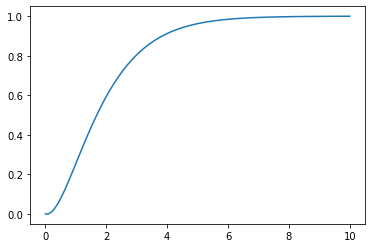

In [91]:
fig, ax = plt.subplots(1, 1)

N = 100  # Number of steps in simulation
t, X_mean = ode_euler(t0, X0, T, a, 100)

ax.plot(t, X_mean, label='Euler scheme: {} steps'.format(N))


Como el método de Euler es un método de primer orden, el error será proporcional al cuadrado del tamaño de las discretizaciones.

#### Ejercicio 3.3.
1. Simula mediante el método de Euler-Maruyana (estocástico) y muestra gráficamente las trayectorias del proceso descrito por la ecuación diferencial estocástica 
$$
dr(t) =  - \alpha \left(r(t) - r_{\infty} \left(1 - e^{-\beta \left(t - t_0 \right)} \right) \right) dt + \sigma dW(t),
$$
partiendo de la condición inicial $r(t_0) = r_0$.
2. Sobre la gráfca de las simulaciones, muestra la media de las trayectorias y la curva para  $\mathbb{E} \left[r(t) \right]$.  Muestra asimismo los niveles asintóticos para la media y para la media más menos dos desviaciones estándar.
3. ¿Qué orden de convergencia tiene el método de Euler estocástico? Ilustra la respuesta de manera gráfica.

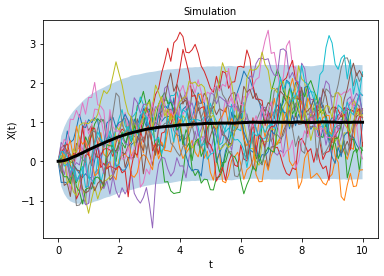

In [92]:
# Carry out simulation
t, X_euler = sde.euler_maruyana(t0, X0, T, a, b, M, N)
media = np.mean(X_euler, axis=0)
std = np.std(X_euler, axis=0)
a = 2.0

# Plot trajectories 
stoch.plot_trajectories(t, X_euler, fig_num=1)
plt.fill_between(t, media - a*std,
                 media + a*std, alpha=0.3)

#### Ejercicio 3.4.
1. Simula mediante el método de Milstein y muestra gráficamente las trayectorias del proceso descrito por la ecuación diferencial estocástica
$$
dr(t) =  - \alpha \left(r(t) - r_{\infty} \left(1 - e^{-\beta \left(t - t_0 \right)} \right) \right) dt + \sigma dW(t),
$$
partiendo de la condición inicial $r(t_0) = r_0$.
2. Sobre la gráfca de las simulaciones, muestra la media de las trayectorias y la curva para  $\mathbb{E} \left[r(t) \right]$. Muestra asimismo los niveles asintóticos para la media y para la media más menos dos desviaciones estándar.
3. ¿Qué orden de convergencia tiene el método de MIlstein? Ilustra la respuesta de manera gráfica.

In [ ]:
# Define SDE
def a(t, x): 
    return -alpha*(x - r_inf*(1 - np.exp(-beta*(t - t0))))

def b(t,x): 
    return sigma

def db_dx(t,x): 
    return 0

alpha = 1.0
beta = 1.0
r_inf = 1.0

t0 = 0
X0 = 0
T = 10.0
M = 10000
N = 100
sigma = 1.0

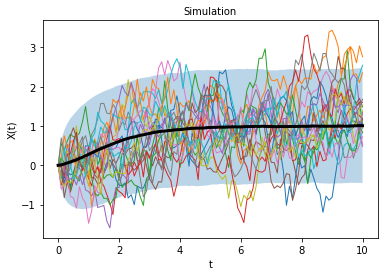

In [96]:
t, X_milstein = sde.milstein(t0, X0, T, a, b, db_dx, M, N)

media = np.mean(X_milstein, axis=0)
std = np.std(X_milstein, axis=0)
a = 2.0

# Plot trajectories 
stoch.plot_trajectories(t, X_milstein, fig_num=1) 
plt.fill_between(t, media - a*std,
                 media + a*std, alpha=0.3)

El método de Milstein tiene una convergencia del orden $\Delta T$.